In [42]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Read the data

Read the data: Gender (1 for males, 2 for females), Age group (1 for 20-46, 2 for 46+), Brain weight (grams) and head size (cubic cm) for 237 adults.

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123

In [23]:
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/brainhead.dat", sep=" ", skipinitialspace=True, header=None)

In [24]:
df.head()

,0,1,2,3
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Name the columns

In [25]:
df.rename(columns={0:"gender",1:"age group",2:"head size", 3:"brain weight"}, inplace=True)

In [26]:
df.head()

,gender,age group,head size,brain weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Plot the data

Plot the brain weight vs. head size for younger males only.

In [40]:
youngmen = df[df["gender"]==1][df["age group"]==1]

/home/kaan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


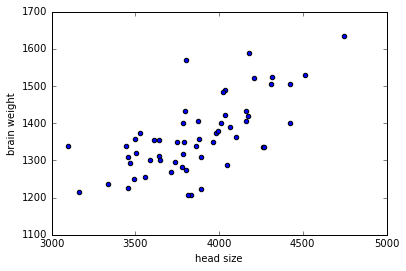

In [48]:
plt.scatter(youngmen["head size"], youngmen["brain weight"])
plt.xlabel("head size (cm^3)")
plt.ylabel("brain weight (g)")
plt.title("Brain weight vs. head size")

Extract the data for older men, plot allmen together:

In [60]:
oldmen = df[df["gender"]==1][df["age group"]==2]

/home/kaan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


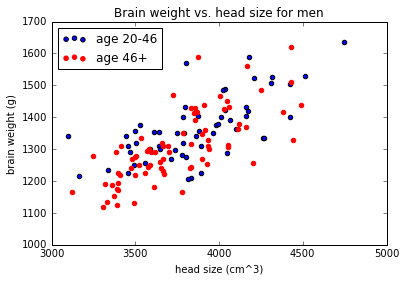

In [61]:
plt.scatter(youngmen["head size"], youngmen["brain weight"])
plt.scatter(oldmen["head size"], oldmen["brain weight"],color="r")
plt.xlabel("head size (cm^3)")
plt.ylabel("brain weight (g)")
plt.title("Brain weight vs. head size for men")
plt.legend(["age 20-46","age 46+"],loc="upper left")

In [52]:
youngwomen = df[df["gender"]==2][df["age group"]==1]
oldwomen = df[df["gender"]==2][df["age group"]==2]

/home/kaan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/kaan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


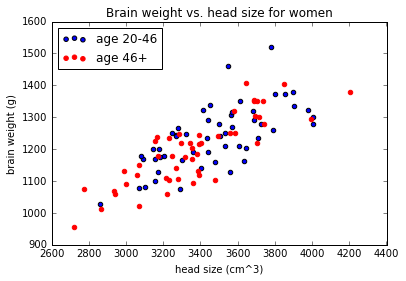

In [59]:
plt.scatter(youngwomen["head size"], youngwomen["brain weight"])
plt.scatter(oldwomen["head size"], oldwomen["brain weight"],color="r")
plt.xlabel("head size (cm^3)")
plt.ylabel("brain weight (g)")
plt.title("Brain weight vs. head size for women")
plt.legend(["age 20-46","age 46+"],loc="upper left")

Plot men and women together for comparison.

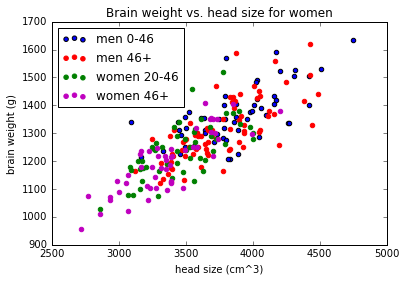

In [62]:
plt.scatter(youngmen["head size"], youngmen["brain weight"])
plt.scatter(oldmen["head size"], oldmen["brain weight"],color="r")
plt.scatter(youngwomen["head size"], youngwomen["brain weight"], color="g")
plt.scatter(oldwomen["head size"], oldwomen["brain weight"],color="m")
plt.xlabel("head size (cm^3)")
plt.ylabel("brain weight (g)")
plt.title("Brain weight vs. head size for women")
plt.legend(["men 0-46","men 46+", "women 20-46","women 46+"],loc="upper left")

We see that the correlation is about the same, but women, on average, have smaller heads and brains.

## Distributions

Distribution of male head sizes

In [70]:
allmen = df[df["gender"]==1]

In [72]:
allmen["head size"].describe()

count     134.000000
mean     3798.261194
std       327.764883
min      3095.000000
25%      3538.500000
50%      3794.500000
75%      4029.500000
max      4747.000000
Name: head size, dtype: float64

In [93]:
allmen["brain weight"].describe()

count     134.000000
mean     1331.858209
std       108.933390
min      1120.000000
25%      1252.750000
50%      1313.500000
75%      1400.000000
max      1635.000000
Name: brain weight, dtype: float64

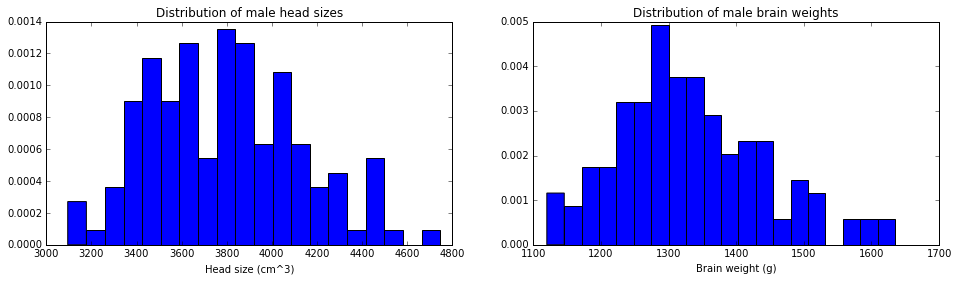

In [88]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(allmen["head size"],bins=20,normed=True);
plt.xlabel("Head size (cm^3)")
plt.title("Distribution of male head sizes");
plt.subplot(1,2,2)
plt.hist(allmen["brain weight"],bins=20,normed=True);
plt.xlabel("Brain weight (g)")
plt.title("Distribution of male brain weights");

Distributionof female head and brain sizes

In [89]:
allwomen = df[df["gender"]==2]

In [90]:
allwomen["head size"].describe()

count     103.000000
mean     3420.281553
std       295.021615
min      2720.000000
25%      3216.000000
50%      3394.000000
75%      3637.000000
max      4204.000000
Name: head size, dtype: float64

In [91]:
allwomen["brain weight"].describe()

count     103.000000
mean     1219.145631
std       103.829933
min       955.000000
25%      1146.000000
50%      1220.000000
75%      1290.000000
max      1520.000000
Name: brain weight, dtype: float64

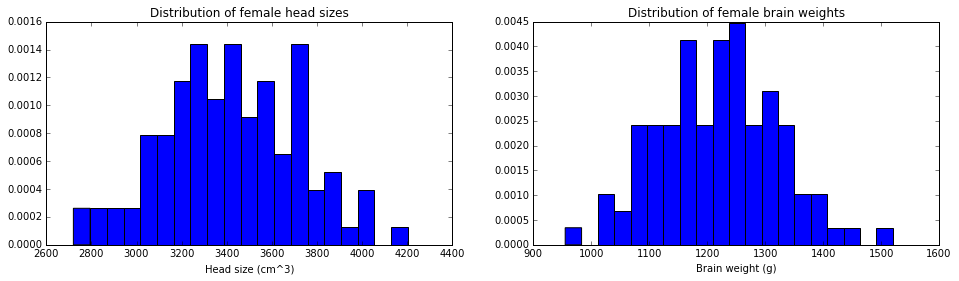

In [92]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(allwomen["head size"],bins=20,normed=True);
plt.xlabel("Head size (cm^3)")
plt.title("Distribution of female head sizes");
plt.subplot(1,2,2)
plt.hist(allwomen["brain weight"],bins=20,normed=True);
plt.xlabel("Brain weight (g)")
plt.title("Distribution of female brain weights");

## Linear regression using scikit-learn

In [94]:
from sklearn import linear_model

In [104]:
regr_men = linear_model.LinearRegression()

In [105]:
regr_men.fit(allmen["head size"].reshape(-1,1), allmen["brain weight"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

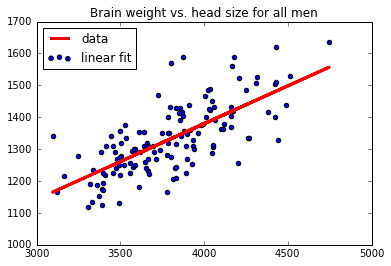

In [106]:
plt.scatter(allmen["head size"], allmen["brain weight"])
plt.plot(allmen["head size"], regr_men.predict(allmen["head size"].reshape(-1,1)), color='red',linewidth=3)
plt.title("Brain weight vs. head size for all men")
plt.legend(["data","linear fit"],loc="upper left")

In [107]:
regr_women = linear_model.LinearRegression()

In [108]:
regr_women.fit(allwomen["head size"].reshape(-1,1), allwomen["brain weight"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

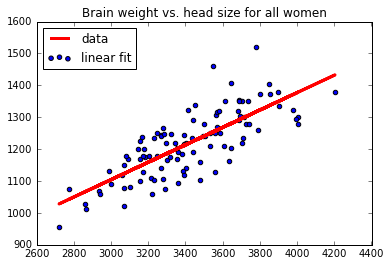

In [109]:
plt.scatter(allwomen["head size"], allwomen["brain weight"])
plt.plot(allwomen["head size"], regr_women.predict(allwomen["head size"].reshape(-1,1)), color='red',linewidth=3)
plt.title("Brain weight vs. head size for all women")
plt.legend(["data","linear fit"],loc="upper left")